In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm
import logging
import numpy as np

import pandas as pd
pd.set_option('display.max_columns',None)
import numpy as np

import geopandas as gpd
from shapely import Point, LineString, Polygon, MultiPoint
from shapely.ops import nearest_points
from sklearn.cluster import DBSCAN

from tqdm import tqdm
tqdm.pandas()

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager as fm, rc

# 한글 폰트 설정
font_path = '/usr/local/src/python3.10/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/KoPub Dotum Medium.ttf'
font_name = fm.FontProperties(fname=font_path).get_name()
plt.rc('font', family=font_name)

import yfinance as yf

In [14]:
# 애플(Apple Inc.) 주식 데이터 다운로드 (1년치 데이터)
data = yf.download('AAPL', start='2020-01-01', end='2023-01-01', interval='1d')

# 데이터 확인
data = data[['Close']]

[*********************100%***********************]  1 of 1 completed


In [15]:
data.dropna()

Price,Close
Ticker,AAPL
Date,
2020-01-02,72.796028
2020-01-03,72.088295
2020-01-06,72.662720
2020-01-07,72.320961
2020-01-08,73.484352
...,...
2022-12-23,130.487808
2022-12-27,128.676849


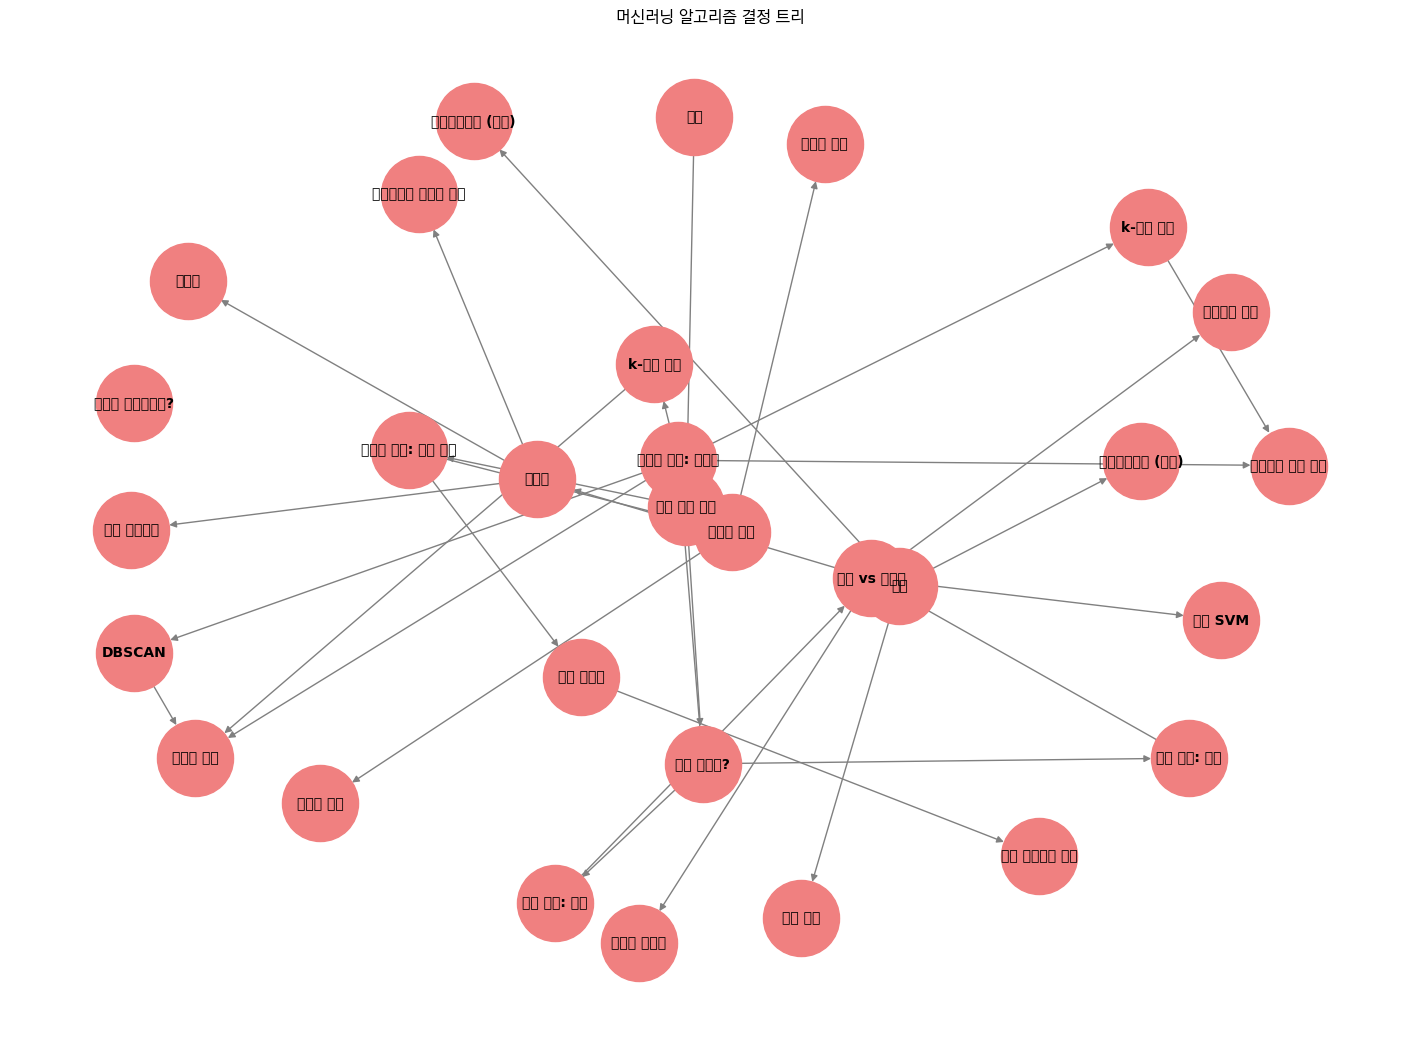

In [33]:
import networkx as nx
import matplotlib.pyplot as plt
# 한글로 변환된 데이터 생성
nodes_ko = {
    "START": "시작",
    "차원 축소 여부": "차원 축소 여부",
    "답이 있는가?": "답이 있는가?",
    "숫자를 예측하는가?": "숫자를 예측하는가?",
    "비지도 학습: 군집화": "비지도 학습: 군집화",
    "비지도 학습: 차원 축소": "비지도 학습: 차원 축소",
    "지도 학습: 분류": "지도 학습: 분류",
    "지도 학습: 회귀": "지도 학습: 회귀",
    "주제 모델링": "주제 모델링",
    "확률적 접근": "확률적 접근",
    "잠재 디리클레 할당": "잠재 디리클레 할당",
    "주성분 분석": "주성분 분석",
    "특이값 분해": "특이값 분해",
    "속도 vs 정확도": "속도 vs 정확도",
    "속도": "속도",
    "정확도": "정확도",
    "의사결정나무 (분류)": "의사결정나무 (분류)",
    "로지스틱 회귀": "로지스틱 회귀",
    "나이브 베이즈": "나이브 베이즈",
    "커널 SVM": "커널 SVM",
    "랜덤 포레스트": "랜덤 포레스트",
    "신경망": "신경망",
    "그래디언트 부스팅 트리": "그래디언트 부스팅 트리",
    "의사결정나무 (회귀)": "의사결정나무 (회귀)",
    "선형 회귀": "선형 회귀",
    "가우시안 혼합 모델": "가우시안 혼합 모델",
    "k-평균 군집": "k-평균 군집",
    "k-모드 군집": "k-모드 군집",
    "계층적 군집": "계층적 군집",
    "DBSCAN": "DBSCAN"
}

# 한글 노드 추가
G_ko = nx.DiGraph()
G_ko.add_nodes_from(nodes_ko.values())

# 한글 엣지 추가 (논리적 흐름)
edges_ko = [
    ("시작", "차원 축소 여부"),
    ("차원 축소 여부", "비지도 학습: 차원 축소"),
    ("차원 축소 여부", "답이 있는가?"),
    ("비지도 학습: 차원 축소", "주제 모델링"),
    ("비지도 학습: 차원 축소", "확률적 접근"),
    ("주제 모델링", "잠재 디리클레 할당"),
    ("확률적 접근", "주성분 분석"),
    ("확률적 접근", "특이값 분해"),
    ("답이 있는가?", "비지도 학습: 군집화"),
    ("답이 있는가?", "지도 학습: 분류"),
    ("답이 있는가?", "지도 학습: 회귀"),
    ("지도 학습: 분류", "속도 vs 정확도"),
    ("지도 학습: 회귀", "속도 vs 정확도"),
    ("속도 vs 정확도", "속도"),
    ("속도 vs 정확도", "정확도"),
    ("속도", "의사결정나무 (분류)"),
    ("속도", "의사결정나무 (회귀)"),
    ("속도", "선형 회귀"),
    ("정확도", "랜덤 포레스트"),
    ("정확도", "신경망"),
    ("정확도", "그래디언트 부스팅 트리"),
    ("비지도 학습: 군집화", "k-평균 군집"),
    ("비지도 학습: 군집화", "k-모드 군집"),
    ("비지도 학습: 군집화", "가우시안 혼합 모델"),
    ("비지도 학습: 군집화", "DBSCAN"),
    ("비지도 학습: 군집화", "계층적 군집"),
    ("k-평균 군집", "가우시안 혼합 모델"),
    ("k-모드 군집", "계층적 군집"),
    ("DBSCAN", "계층적 군집"),
    ("속도 vs 정확도", "로지스틱 회귀"),
    ("속도 vs 정확도", "커널 SVM"),
    ("속도 vs 정확도", "나이브 베이즈")
]

# 한글 엣지 추가
G_ko.add_edges_from(edges_ko)

# 한글 그래프 그리기
plt.figure(figsize=(14, 10))
pos_ko = nx.spring_layout(G_ko, seed=42, k=1)  # 레이아웃 설정
nx.draw(G_ko, pos_ko, with_labels=True, node_color="lightcoral", edge_color="gray", node_size=3000, font_size=10, font_weight="bold", arrows=True)
plt.title("머신러닝 알고리즘 결정 트리")
plt.show()


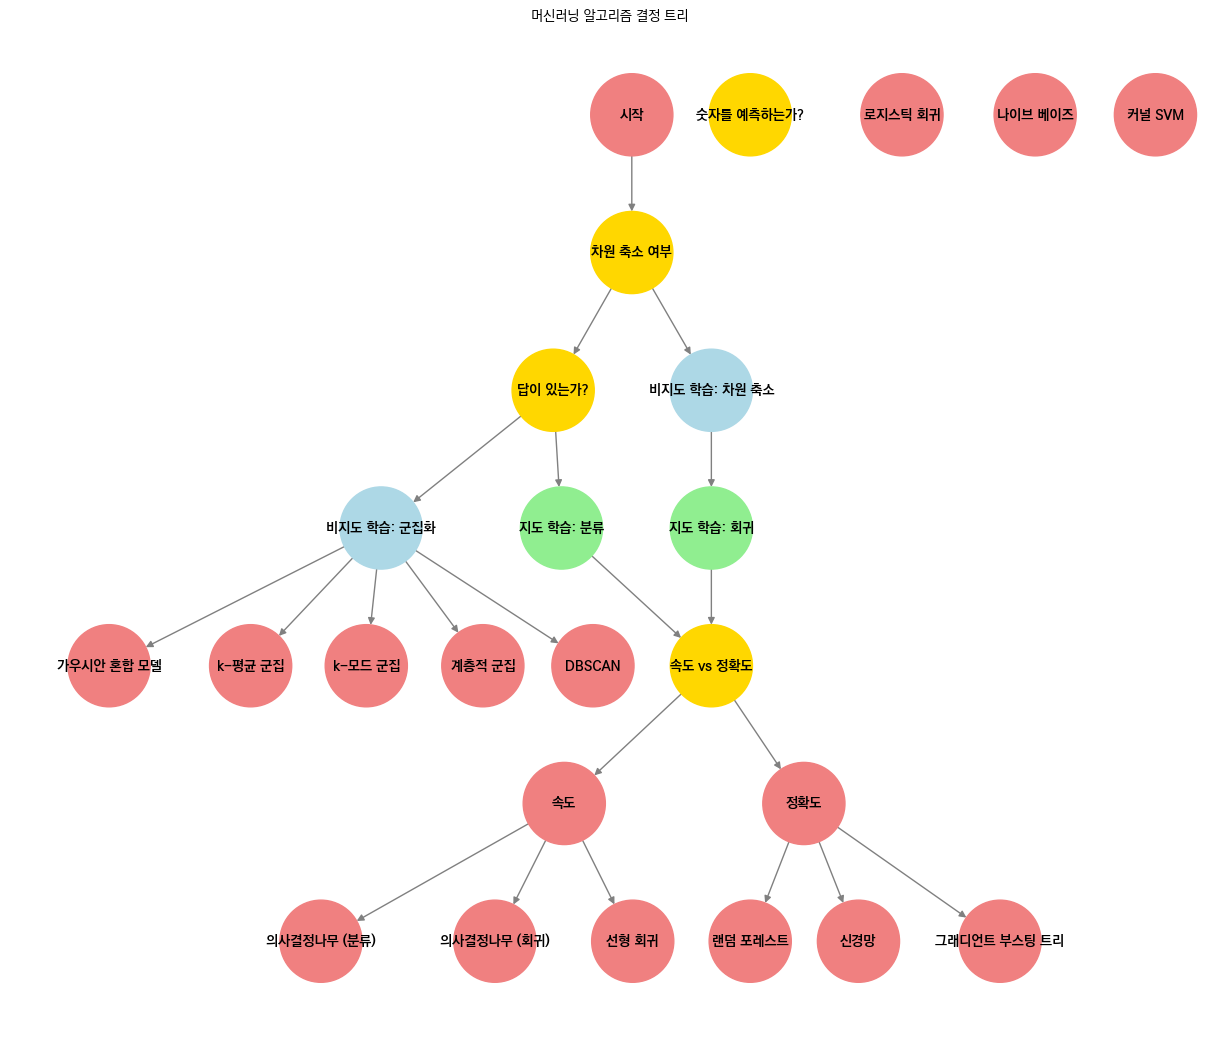

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 🔹 KoPub Dotum 폰트 적용 (설치된 경로 확인 후 변경 필요)
font_path = "/usr/local/src/python3.10/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/KoPub Dotum Medium.ttf"  # 폰트 경로 확인 필요
font_prop = fm.FontProperties(fname=font_path, size=10)

# ✅ 네트워크 그래프 데이터 생성 (머신러닝 알고리즘 결정 트리)
G_ko = nx.DiGraph()

# 노드 추가 (의사결정 질문 및 알고리즘)
nodes = {
    "START": "시작",
    "차원 축소 여부": "차원 축소 여부",
    "답이 있는가?": "답이 있는가?",
    "숫자를 예측하는가?": "숫자를 예측하는가?",
    "비지도 학습: 군집화": "비지도 학습: 군집화",
    "비지도 학습: 차원 축소": "비지도 학습: 차원 축소",
    "지도 학습: 분류": "지도 학습: 분류",
    "지도 학습: 회귀": "지도 학습: 회귀",
    "속도 vs 정확도": "속도 vs 정확도",
    "속도": "속도",
    "정확도": "정확도",
    "의사결정나무 (분류)": "의사결정나무 (분류)",
    "로지스틱 회귀": "로지스틱 회귀",
    "나이브 베이즈": "나이브 베이즈",
    "커널 SVM": "커널 SVM",
    "랜덤 포레스트": "랜덤 포레스트",
    "신경망": "신경망",
    "그래디언트 부스팅 트리": "그래디언트 부스팅 트리",
    "의사결정나무 (회귀)": "의사결정나무 (회귀)",
    "선형 회귀": "선형 회귀",
    "가우시안 혼합 모델": "가우시안 혼합 모델",
    "k-평균 군집": "k-평균 군집",
    "k-모드 군집": "k-모드 군집",
    "계층적 군집": "계층적 군집",
    "DBSCAN": "DBSCAN"
}

# 🔹 노드 추가
G_ko.add_nodes_from(nodes.values())

# 🔹 논리적 흐름을 나타내는 엣지 추가
edges = [
    ("시작", "차원 축소 여부"),
    ("차원 축소 여부", "비지도 학습: 차원 축소"),
    ("차원 축소 여부", "답이 있는가?"),
    ("비지도 학습: 차원 축소", "지도 학습: 회귀"),
    ("답이 있는가?", "비지도 학습: 군집화"),
    ("답이 있는가?", "지도 학습: 분류"),
    ("지도 학습: 분류", "속도 vs 정확도"),
    ("지도 학습: 회귀", "속도 vs 정확도"),
    ("속도 vs 정확도", "속도"),
    ("속도 vs 정확도", "정확도"),
    ("속도", "의사결정나무 (분류)"),
    ("속도", "의사결정나무 (회귀)"),
    ("속도", "선형 회귀"),
    ("정확도", "랜덤 포레스트"),
    ("정확도", "신경망"),
    ("정확도", "그래디언트 부스팅 트리"),
    ("비지도 학습: 군집화", "k-평균 군집"),
    ("비지도 학습: 군집화", "k-모드 군집"),
    ("비지도 학습: 군집화", "가우시안 혼합 모델"),
    ("비지도 학습: 군집화", "DBSCAN"),
    ("비지도 학습: 군집화", "계층적 군집")
]

# 🔹 엣지 추가
G_ko.add_edges_from(edges)

# ✅ 계층적인 레이아웃 적용 (Graphviz 라이브러리 사용)
pos_ko = nx.nx_agraph.graphviz_layout(G_ko, prog="dot")  # 트리형 구조

# 🔹 색상 구분
question_nodes = {"차원 축소 여부", "답이 있는가?", "숫자를 예측하는가?", "속도 vs 정확도"}
unsupervised_nodes = {"비지도 학습: 군집화", "비지도 학습: 차원 축소"}
supervised_nodes = {"지도 학습: 분류", "지도 학습: 회귀"}
algorithm_nodes = set(G_ko.nodes()) - (question_nodes | unsupervised_nodes | supervised_nodes)

node_colors = []
for node in G_ko.nodes():
    if node in question_nodes:
        node_colors.append("gold")  # 주요 질문 (노란색)
    elif node in unsupervised_nodes:
        node_colors.append("lightblue")  # 비지도 학습 (파란색)
    elif node in supervised_nodes:
        node_colors.append("lightgreen")  # 지도 학습 (연두색)
    else:
        node_colors.append("lightcoral")  # 알고리즘 (빨간색)

# 🔹 그래프 그리기 (입체 효과 추가)
plt.figure(figsize=(12,10))
nx.draw(G_ko, pos_ko, with_labels=True, node_color=node_colors, edge_color="gray",
        node_size=3500, font_size=10, font_weight="bold", arrows=True,
        font_family=font_prop.get_name())  # ✅ 폰트 적용

# 🔹 제목 추가
plt.title("머신러닝 알고리즘 결정 트리", fontproperties=font_prop)
plt.show()


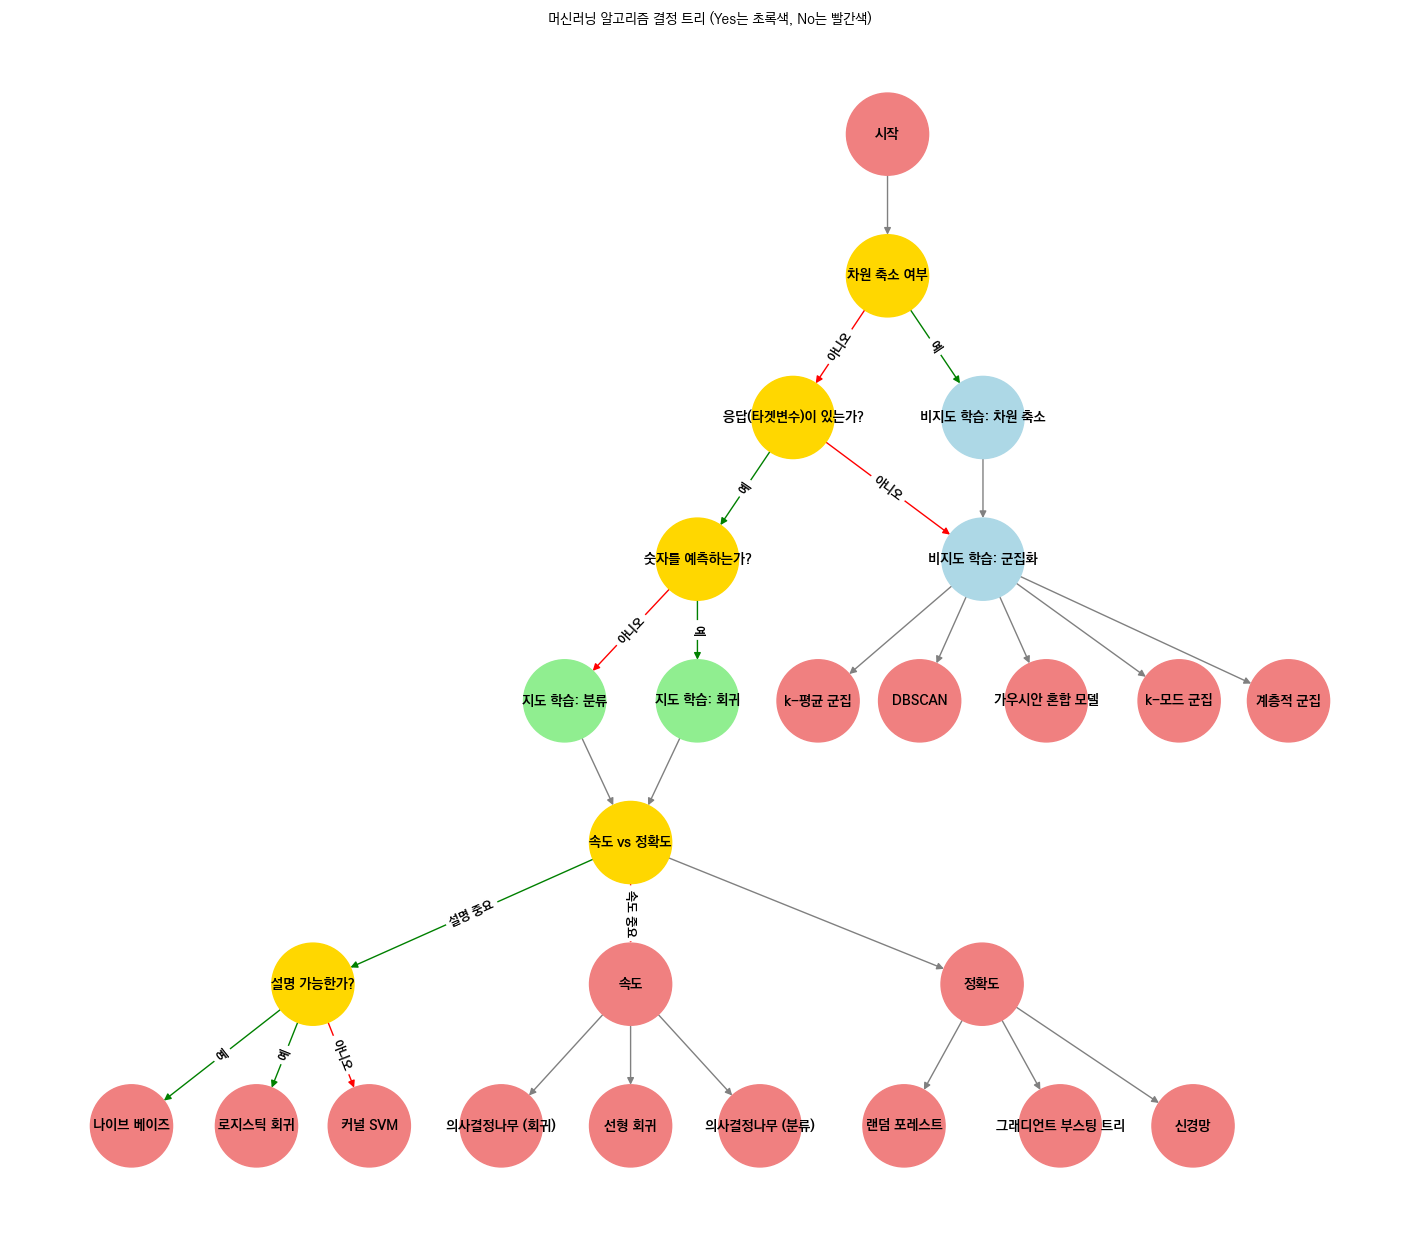

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 🔹 KoPub Dotum 폰트 적용 (설치된 경로 확인 후 변경 필요)
font_path = "/usr/local/src/python3.10/lib/python3.10/site-packages/matplotlib/mpl-data/fonts/ttf/KoPub Dotum Medium.ttf"  # 폰트 경로 확인 필요
font_prop = fm.FontProperties(fname=font_path, size=10)

# ✅ 네트워크 그래프 데이터 생성 (머신러닝 알고리즘 결정 트리)
G_ko = nx.DiGraph()

# 🔹 올바른 노드 목록 (한글 변환 및 원본 이미지와 동일하게 구성)
nodes_corrected = {
    "시작", "차원 축소 여부", "응답(타겟변수)이 있는가?", "숫자를 예측하는가?",
    "비지도 학습: 군집화", "비지도 학습: 차원 축소",
    "지도 학습: 분류", "지도 학습: 회귀",
    "속도 vs 정확도", "설명 가능한가?", "속도", "정확도",
    "의사결정나무 (분류)", "로지스틱 회귀", "나이브 베이즈", "커널 SVM",
    "랜덤 포레스트", "신경망", "그래디언트 부스팅 트리",
    "의사결정나무 (회귀)", "선형 회귀", "가우시안 혼합 모델",
    "k-평균 군집", "k-모드 군집", "계층적 군집", "DBSCAN"
}

# 노드 추가
G_ko.add_nodes_from(nodes_corrected)

# 🔹 올바른 엣지 목록 (Yes/No 표시 추가)
edges_corrected = {
    ("시작", "차원 축소 여부"),

    # 차원 축소 분기
    ("차원 축소 여부", "비지도 학습: 차원 축소"),
    ("차원 축소 여부", "응답(타겟변수)이 있는가?"),

    # 비지도 학습
    ("비지도 학습: 차원 축소", "비지도 학습: 군집화"),

    # 지도 학습 분기
    ("응답(타겟변수)이 있는가?", "비지도 학습: 군집화"),
    ("응답(타겟변수)이 있는가?", "숫자를 예측하는가?"),
    
    # 회귀 vs 분류
    ("숫자를 예측하는가?", "지도 학습: 회귀"),
    ("숫자를 예측하는가?", "지도 학습: 분류"),
    
    # 지도 학습 분기
    ("지도 학습: 분류", "속도 vs 정확도"),
    ("지도 학습: 회귀", "속도 vs 정확도"),

    # 속도 vs 정확도 분기
    ("속도 vs 정확도", "설명 가능한가?"),
    ("설명 가능한가?", "로지스틱 회귀"),
    ("설명 가능한가?", "나이브 베이즈"),
    ("설명 가능한가?", "커널 SVM"),

    # 속도 vs 정확도 분기 계속
    ("속도 vs 정확도", "속도"),
    ("속도 vs 정확도", "정확도"),
    ("속도", "의사결정나무 (분류)"),
    ("속도", "의사결정나무 (회귀)"),
    ("속도", "선형 회귀"),
    ("정확도", "랜덤 포레스트"),
    ("정확도", "신경망"),
    ("정확도", "그래디언트 부스팅 트리"),

    # 비지도 학습 군집화 알고리즘
    ("비지도 학습: 군집화", "k-평균 군집"),
    ("비지도 학습: 군집화", "k-모드 군집"),
    ("비지도 학습: 군집화", "가우시안 혼합 모델"),
    ("비지도 학습: 군집화", "DBSCAN"),
    ("비지도 학습: 군집화", "계층적 군집")
}

# 엣지 추가
G_ko.add_edges_from(edges_corrected)

# ✅ 계층적인 레이아웃 적용 (Graphviz 트리형 구조)
pos_ko = nx.nx_agraph.graphviz_layout(G_ko, prog="dot")

# 🔹 색상 구분
question_nodes = {"차원 축소 여부", "응답(타겟변수)이 있는가?", "숫자를 예측하는가?", "속도 vs 정확도", "설명 가능한가?"}
unsupervised_nodes = {"비지도 학습: 군집화", "비지도 학습: 차원 축소"}
supervised_nodes = {"지도 학습: 분류", "지도 학습: 회귀"}
algorithm_nodes = set(G_ko.nodes()) - (question_nodes | unsupervised_nodes | supervised_nodes)

node_colors = []
for node in G_ko.nodes():
    if node in question_nodes:
        node_colors.append("gold")  # 주요 질문 (노란색)
    elif node in unsupervised_nodes:
        node_colors.append("lightblue")  # 비지도 학습 (파란색)
    elif node in supervised_nodes:
        node_colors.append("lightgreen")  # 지도 학습 (연두색)
    else:
        node_colors.append("lightcoral")  # 알고리즘 (빨간색)

# 🔹 Yes / No 라벨 추가
edge_labels = {
    ("차원 축소 여부", "비지도 학습: 차원 축소"): "예",
    ("차원 축소 여부", "응답(타겟변수)이 있는가?"): "아니오",
    ("응답(타겟변수)이 있는가?", "비지도 학습: 군집화"): "아니오",
    ("응답(타겟변수)이 있는가?", "숫자를 예측하는가?"): "예",
    ("숫자를 예측하는가?", "지도 학습: 회귀"): "예",
    ("숫자를 예측하는가?", "지도 학습: 분류"): "아니오",
    ("속도 vs 정확도", "설명 가능한가?"): "설명 중요",
    ("속도 vs 정확도", "속도"): "속도 중요",
    ("설명 가능한가?", "로지스틱 회귀"): "예",
    ("설명 가능한가?", "나이브 베이즈"): "예",
    ("설명 가능한가?", "커널 SVM"): "아니오",
}

# ✅ Yes/No 엣지 색상 지정
edge_colors = []
for u, v in G_ko.edges():
    if (u, v) in edge_labels:
        if edge_labels[(u, v)] in ["예", "설명 중요"]:
            edge_colors.append("green")  # ✅ Yes (초록색)
        elif edge_labels[(u, v)] in ["아니오", "속도 중요"]:
            edge_colors.append("red")  # ✅ No (빨간색)
        else:
            edge_colors.append("gray")  # 기타 연결
    else:
        edge_colors.append("gray")  # 기본 회색

# ✅ 그래프 다시 그리기 (Yes/No 선 색상 적용)
plt.figure(figsize=(14, 12))
nx.draw(G_ko, pos_ko, with_labels=True, node_color=node_colors, edge_color=edge_colors,
        node_size=3500, font_size=10, font_weight="bold", arrows=True,
        font_family=font_prop.get_name())  # ✅ 폰트 적용

# ✅ Yes/No 라벨 추가 (폰트 문제 해결)
nx.draw_networkx_edge_labels(G_ko, pos_ko, edge_labels=edge_labels,
                             font_size=9, font_color="black", font_weight="bold", 
                             font_family=font_prop.get_name())  # ✅ 폰트 적용 방식 변경


# ✅ 제목 추가
plt.title("머신러닝 알고리즘 결정 트리 (Yes는 초록색, No는 빨간색)", fontproperties=font_prop)
plt.show()
